<a href="https://colab.research.google.com/github/Kin9989/207ct40239_QuachNhatHao_231_DIT0300_0103_Lab03.ipynb/blob/main/207ct40239_QuachNhatHao_231_DIT0300_0103_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

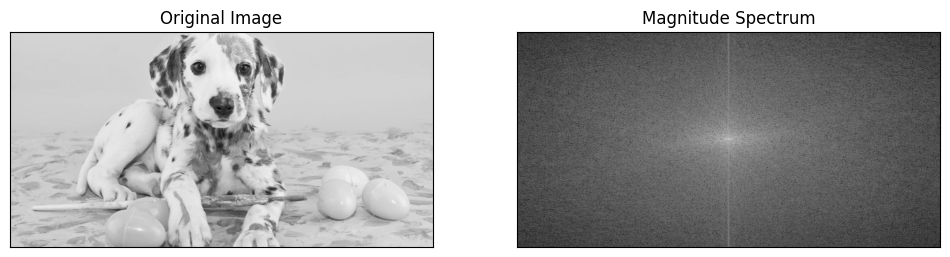

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as hao

# Đọc ảnh và đưa về float32
img = cv2.imread('/content/hinh1.png', 0)
img_float32 = np.float32(img)

# Biến đổi Fourier
dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Tính biên độ của các sóng
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Hiển thị ảnh gốc và biên độ của các sóng
hao.figure(figsize=(12, 6))

hao.subplot(121), hao.imshow(img, cmap='gray')
hao.title('Original Image'), hao.xticks([]), hao.yticks([])

hao.subplot(122), hao.imshow(magnitude_spectrum, cmap='gray')
hao.title('Magnitude Spectrum'), hao.xticks([]), hao.yticks([])

hao.show()


In [ ]:
# # Câu 2 lab3
# Đoạn code trên sử dụng thư viện Matplotlib để hiển thị hai hình ảnh trong cùng một figure. Dưới đây là giải thích ý nghĩa của từng dòng lệnh:

#     1 plt.subplot(121), plt.imshow(img, cmap='gray'):
#         plt.subplot(121): Tạo một ô hình ảnh trong figure với 1 hàng và 2 cột, và đang định vị ở ô thứ nhất (1).
#         plt.imshow(img, cmap='gray'): Hiển thị ảnh img trong ô này, sử dụng colormap 'gray' để đảm bảo hiển thị màu xám cho ảnh grayscale.
#         plt.title('Input Image'): Đặt tiêu đề cho ô hình ảnh là 'Input Image'.
#         plt.xticks([]), plt.yticks([]): Ẩn các đường gợi ý trên trục x và y.

#     2 plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray'):
#         plt.subplot(122): Tạo một ô hình ảnh trong figure với 1 hàng và 2 cột, và đang định vị ở ô thứ hai (2).
#         plt.imshow(magnitude_spectrum, cmap='gray'): Hiển thị ảnh biên độ magnitude_spectrum trong ô này, sử dụng colormap 'gray'.
#         plt.title('Magnitude Spectrum'): Đặt tiêu đề cho ô hình ảnh là 'Magnitude Spectrum'.
#         plt.xticks([]), plt.yticks([]): Ẩn các đường gợi ý trên trục x và y.

#     3 plt.show(): Hiển thị figure chứa cả hai ô hình ảnh.

# Tổng cộng, đoạn code này giúp hiển thị ảnh gốc và biên độ của các sóng trong miền tần số cùng một lúc để so sánh.

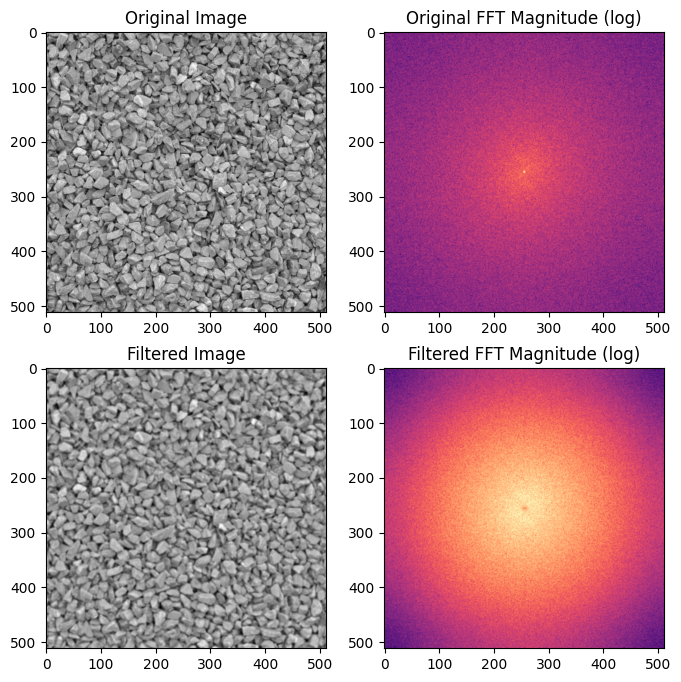

In [ ]:
import matplotlib.pyplot as hao
import numpy as np
from skimage.data import gravel
from skimage.filters import difference_of_gaussians, window
from scipy.fft import fftn, fftshift

image = gravel()
wimage = image * window('hann', image.shape)  # window image to improve FFT
filtered_image = difference_of_gaussians(image, 1, 12)
filtered_wimage = filtered_image * window('hann', image.shape)
im_f_mag = fftshift(np.abs(fftn(wimage)))
fim_f_mag = fftshift(np.abs(fftn(filtered_wimage)))

fig, ax = hao.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(np.log(im_f_mag), cmap='magma')
ax[0, 1].set_title('Original FFT Magnitude (log)')
ax[1, 0].imshow(filtered_image, cmap='gray')
ax[1, 0].set_title('Filtered Image')
ax[1, 1].imshow(np.log(fim_f_mag), cmap='magma')
ax[1, 1].set_title('Filtered FFT Magnitude (log)')
hao.show()


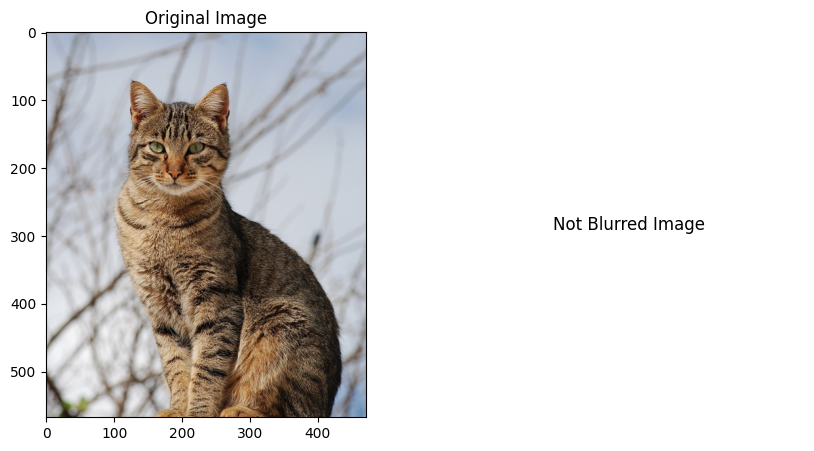

In [8]:
# câu 3 từ code trên viết thêm một đoạn check ảnh có mờ hay không
import matplotlib.pyplot as hao
import numpy as np
from skimage.filters import difference_of_gaussians, window
from scipy.fft import fftn, fftshift
from skimage import io, color

def is_image_blurred(image):
    wimage = image * window('hann', image.shape)
    f_image = fftshift(np.abs(fftn(wimage)))

    # Calculate the average of the FFT Magnitude plot
    avg_magnitude = np.mean(np.log(f_image))

    # Threshold to determine whether the image is blurred or not
    threshold = 1.5  # Adjust the threshold based on desired blur level
    return avg_magnitude < threshold

# Read the image from file or URL
image_path = "/content/Screenshot 2023-11-05 193304.png"
image = io.imread(image_path)

# Convert RGBA image to RGB
image = color.rgba2rgb(image)

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Check if the image is blurred
result = is_image_blurred(image_gray)

# Display the original image and the result of the blur check
fig, ax = hao.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title('Original Image')

if result:
    ax[1].text(0.5, 0.5, 'Blurred Image', fontsize=12, ha='center', va='center')
else:
    ax[1].text(0.5, 0.5, 'Not Blurred Image', fontsize=12, ha='center', va='center')

ax[1].axis('off')
hao.show()



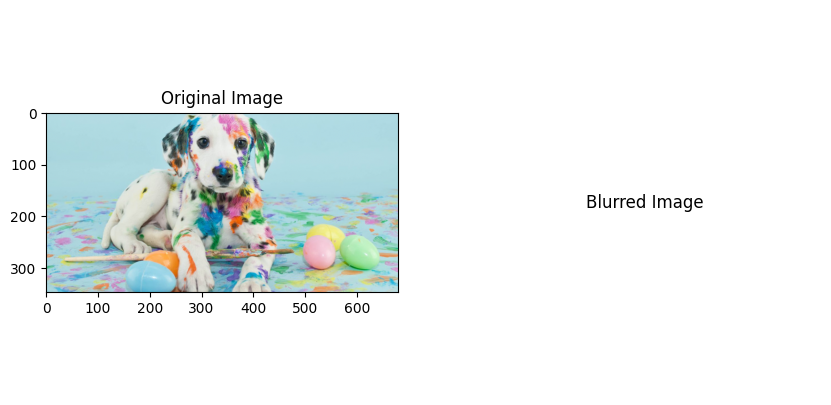

In [9]:
# câu 3 từ code trên viết thêm một đoạn check ảnh có mờ hay không
import matplotlib.pyplot as hao
import numpy as np
from skimage.filters import difference_of_gaussians, window
from scipy.fft import fftn, fftshift
from skimage import io, color

def is_image_blurred(image):
    wimage = image * window('hann', image.shape)
    f_image = fftshift(np.abs(fftn(wimage)))

    # Calculate the average of the FFT Magnitude plot
    avg_magnitude = np.mean(np.log(f_image))

    # Threshold to determine whether the image is blurred or not
    threshold = 1.5  # Adjust the threshold based on desired blur level
    return avg_magnitude < threshold

# Read the image from file or URL
image_path = "/content/hinh1.png"
image = io.imread(image_path)

# Convert RGBA image to RGB
image = color.rgba2rgb(image)

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Check if the image is blurred
result = is_image_blurred(image_gray)

# Display the original image and the result of the blur check
fig, ax = hao.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title('Original Image')

if result:
    ax[1].text(0.5, 0.5, 'Blurred Image', fontsize=12, ha='center', va='center')
else:
    ax[1].text(0.5, 0.5, 'Not Blurred Image', fontsize=12, ha='center', va='center')

ax[1].axis('off')
hao.show()
